In [ ]:

!pip install scipy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import numpy as np


In [3]:
df=pd.read_csv(r"/content/download (1).csv")
df.head()



name planet_status     mass  mass_error_min  mass_error_max  \
0  109 Psc b     Confirmed   5.7430         0.28900         0.28900   
1  112 Psc b     Confirmed   0.0330         0.00500         0.00500   
2  112 Psc c     Confirmed   9.8660         1.78100         1.78100   
3  11 Com Ab     Confirmed  16.1284         1.53491         1.53491   
4   11 UMi b     Confirmed  11.0873         1.10000         1.10000   

   mass_sini  mass_sini_error_min  mass_sini_error_max  radius  \
0     6.3830              0.07800              0.07800   1.152   
1     0.0330              0.00500              0.00500     NaN   
2        NaN                  NaN                  NaN     NaN   
3    16.1284              1.53491              1.53491     NaN   
4    11.0873              1.10000              1.10000     NaN   

   radius_error_min  ...  star_sp_type  star_age  star_age_error_min  \
0               NaN  ...         G5 IV      6.90                0.60   
1               NaN  ...          G0IV       NaN                 NaN   
2               NaN  ...          G0IV       NaN                 NaN   
3               NaN  ...         G8III       NaN                 NaN   
4               NaN  ...         K4III      1.56                0.54   

   star_age_error_max  star_teff  star_teff_error_min  star_teff_error_max  \
0                0.60     5600.0               80.000               80.000   
1                 NaN     5986.0              105.437              105.437   
2                 NaN     5986.0              105.437              105.437   
3                 NaN     4742.0              100.000              100.000   
4                0.54     4340.0               70.000               70.000   

   star_detected_disc  star_magnetic_field  star_alternate_names  
0                 NaN                  NaN              HD 10697  
1                 NaN                  NaN              HD 12235  
2                 NaN                  NaN              HD 12235  
3                 NaN                  NaN             HD 107383  
4                 NaN                  NaN                   NaN  

[5 rows x 98 columns]

**QUESTION-01**


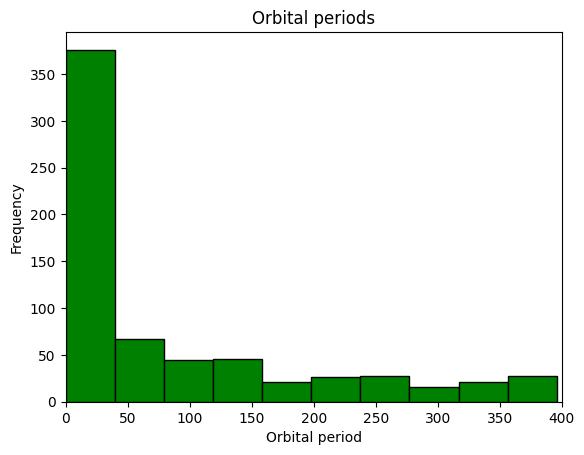

In [4]:
filtered_df=df.loc[df['orbital_period'] <= 400, ['orbital_period']]

plt.hist(filtered_df,bins=10,color='green',edgecolor='black')
plt.title('Orbital periods')
plt.xlabel('Orbital period')
plt.ylabel('Frequency')
plt.xlim(0,400)
plt.show()




**QUESTION-02**



In [5]:
file_path='/content/RV_51Pegasi_Data.txt'
data=[]
# Open the file and read line by line
with open(file_path, 'r') as file:
    for line in file:
            # Assuming columns are separated by spaces or tabs
                    columns = line.strip().split()  # Modify the split() if the separator is different
                    #print(columns)  # Print the list of columns
                    data.append(columns)
ds=pd.DataFrame(data)
ds=ds.iloc[1:,:]
ds.columns=['JD','V(m/s)','SIGMA(m/s)']

ds['JD'] = pd.to_numeric(ds['JD'], errors='coerce')
ds['V(m/s)'] = pd.to_numeric(ds['V(m/s)'], errors='coerce')
ds['SIGMA(m/s)'] = pd.to_numeric(ds['SIGMA(m/s)'], errors='coerce')



ds.head()






JD  V(m/s)  SIGMA(m/s)
1  2.67365  -40.87         3.3
2  2.80873  -46.96         3.6
3  2.95979  -47.39         4.5
4  3.62695  -19.85         2.9
5  3.73265  -13.47         2.6

In [20]:
x=ds['JD'].values
y=ds['V(m/s)'].values
degree = 100
coefficients = np.polyfit(x, y, degree)

# Generate polynomial values
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x)

plt.figure(figsize=(8,6))



plt.scatter(x,y,color='red',s=100,alpha=1,label="Data points")
plt.plot(x, y_fit, color="blue", label=f"Degree {degree} Fit")
# Add axis labels and title
plt.title('Radial Velocity vs. Time for 51 Pegasi', fontsize=14)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Radial Velocity (km/s)', fontsize=12)


# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()




/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-20-85a2eb969bbb>:4: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, degree)


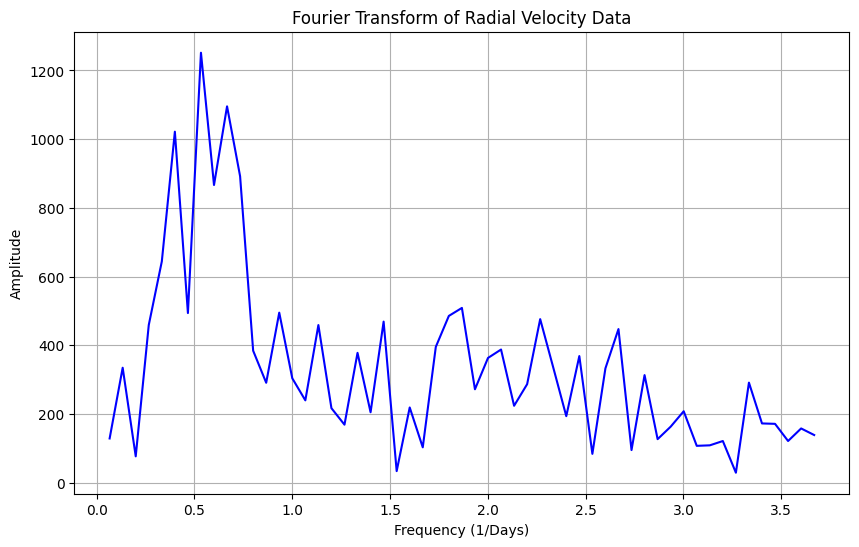

In [22]:
#FOURIER TRANSFORM FOR PATTERN ANALYSIS
time=x
velocity=y
fft_result = np.fft.fft(velocity - np.mean(velocity))
frequencies = np.fft.fftfreq(len(time), d=(time[1] - time[0]))

positive_freq_indices = frequencies > 0
fft_magnitude = np.abs(fft_result[positive_freq_indices])
positive_frequencies = frequencies[positive_freq_indices]

dominant_frequency = positive_frequencies[np.argmax(fft_magnitude)]
orbital_period = 1 / dominant_frequency

plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, fft_magnitude, color='blue')
plt.title("Fourier Transform of Radial Velocity Data")
plt.xlabel("Frequency (1/Days)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()



periodogram analysis

In [35]:
t_min=np.min(time)
t_max=np.max(time)
dur=t_max-t_min
T_max=dur
time_intervals = np.diff(np.sort(time))  # time differences
min_interval = np.min(time_intervals)
T_min = 2 * min_interval
freq = np.linspace(1/T_max, 1/T_min, 1000)
omega = 2 * np.pi * freq

rv=velocity
P_ls = []
N = len(time)
for w in omega:
    cosine_term = np.sum(rv * np.cos(w * time))
    sine_term = np.sum(rv * np.sin(w * time))
    P_ls.append((1/N) * (cosine_term + sine_term))

P_ls = np.array(P_ls)

# Find the period corresponding to the maximum P_ls
best_frequency = frequencies[np.argmax(P_ls)]
best_period = 1 / best_frequency

# Plot the periodogram
plt.plot(1/freq, P_ls)
plt.xlabel("Period")
plt.ylabel("Lomb-Scargle Power")
plt.title("Lomb-Scargle Periodogram")
plt.axvline(best_period, color='red', linestyle='--', label=f"Best Period: {best_period:.2f}")
plt.legend()
plt.show()


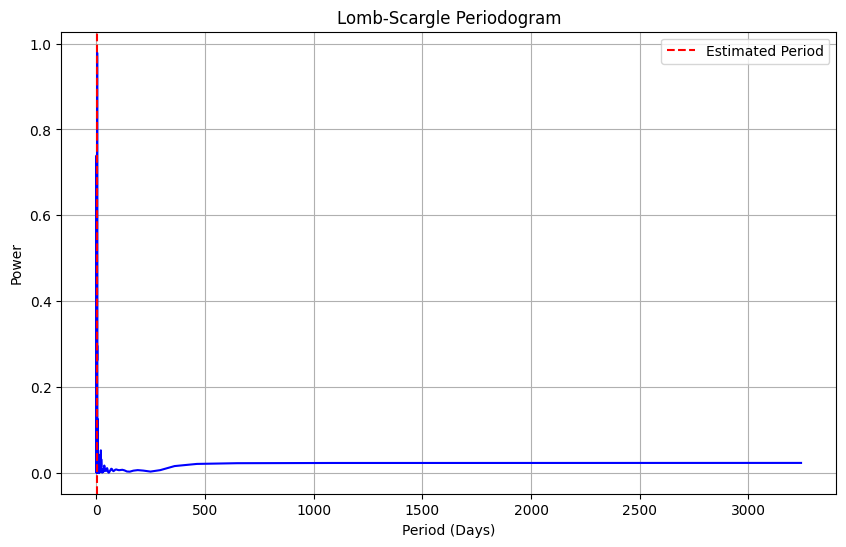

Estimated Orbital Period: 4.23 days


In [36]:
import numpy as np
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt

# Example: Assuming `time` and `radial_velocity` arrays are defined
frequency, power = LombScargle(time, velocity).autopower()

# Convert frequency to period
period = 1 / frequency

# Plotting the Lomb-Scargle periodogram
plt.figure(figsize=(10, 6))
plt.plot(period, power, color='blue')
plt.axvline(period[np.argmax(power)], color='red', linestyle='--', label='Estimated Period')
plt.xlabel("Period (Days)")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram")
plt.legend()
plt.grid()
plt.show()

# Estimated Orbital Period
estimated_period = period[np.argmax(power)]
print(f"Estimated Orbital Period: {estimated_period:.2f} days")


In [38]:
phase = (time / estimated_period) % 1

# Sort by phase for better visualization
sorted_indices = np.argsort(phase)
phase = phase[sorted_indices]
radial_velocity = velocity[sorted_indices]

# Plot the folded radial velocity curve
plt.figure(figsize=(10, 6))
plt.scatter(phase, radial_velocity, color='red', label='Radial Velocity Data')
plt.xlabel("Phase (Orbital Cycle)")
plt.ylabel("Radial Velocity (km/s)")
plt.title("Folded Radial Velocity Curve")
plt.grid()
plt.legend()
plt.show()


# **QUESTION-3**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the datasets
numerical_train_url = "https://t.ly/6WL6Q"
numerical_test_url = "https://t.ly/z6Co_"

train_data = pd.read_csv(numerical_train_url)
test_data = pd.read_csv(numerical_test_url)

# Data Preprocessing
def preprocess_data(data):
    # Handle missing values (if any)
    data.fillna(data.mean(), inplace=True)

    # Separate features and target
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

X_train, y_train = preprocess_data(train_data)
X_test, y_test = preprocess_data(test_data)

# Model Training and Evaluation
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    if y_proba is not None:
        print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Random Forest Model
print("\nRandom Forest Results:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# SVM Model
print("\nSVM Results:")
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
train_and_evaluate_model(svm_model, X_train, y_train, X_test, y_test)


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Load and preprocess the image dataset
data_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

image_data_path = "https://as595.github.io/HTRU1/"
train_dataset = ImageFolder(root=image_data_path + "/train", transform=data_transform)
test_dataset = ImageFolder(root=image_data_path + "/test", transform=data_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a CNN Model
class PulsarClassifierCNN(nn.Module):
    def __init__(self):
        super(PulsarClassifierCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 32 * 32, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Train and evaluate the CNN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PulsarClassifierCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

train_model(model, train_loader, criterion, optimizer)

# Testing Loop
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {correct / total:.2%}")

evaluate_model(model, test_loader)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

# Visualize Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap="Blues")
    plt.title(title)
    plt.show()

# Visualize ROC Curve
def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Example: Visualizations for Random Forest
print("\nRandom Forest Visualization:")
y_rf_pred = rf_model.predict(X_test)
y_rf_proba = rf_model.predict_proba(X_test)[:, 1]
plot_confusion_matrix(y_test, y_rf_pred, "Random Forest Confusion Matrix")
plot_roc_curve(y_test, y_rf_proba, "Random Forest ROC Curve")

# Example: SVM doesn't support predict_proba by default
print("\nSVM Visualization:")
y_svm_pred = svm_model.predict(X_test)
plot_confusion_matrix(y_test, y_svm_pred, "SVM Confusion Matrix")


In [ ]:
# Accuracy and Loss Visualization for CNN
def plot_training_metrics(training_loss, validation_accuracy):
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(training_loss, label="Training Loss", color="blue")
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Validation Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(validation_accuracy, label="Validation Accuracy", color="green")
    plt.title("Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Collect metrics during training
training_loss = []  # Append loss per epoch
validation_accuracy = []  # Append accuracy per epoch

# Update train_model function to record metrics
def train_model_with_metrics(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        training_loss.append(epoch_loss / len(train_loader))

        # Evaluate validation accuracy after each epoch
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        validation_accuracy.append(correct / total)
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {training_loss[-1]:.4f} - Val Accuracy: {validation_accuracy[-1]:.2%}")

# Call the updated train function
train_model_with_metrics(model, train_loader, test_loader, criterion, optimizer, epochs=10)

# Plot metrics
plot_training_metrics(training_loss, validation_accuracy)


In [ ]:
# Feature Importance for Random Forest
importances = rf_model.feature_importances_
features = train_data.columns[:-1]

plt.figure(figsize=(10, 5))
plt.bar(features, importances, color="skyblue")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
